In [1]:
# get train files
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

train_files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    train_files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(train_files_names)
print('There are %d training files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 training files


In [2]:
# import files into dataframe
import numpy as np
import pandas as pd

track_data = []
for building in train_files_names:
    track_data.append([])
    for track_name in building:
        print(track_name)
        track_data[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track_data[-1][-1][0]))

train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# count wifi stations in each track
unique_aps = []
unique_macs = []
for building in track_data:
    for track in building:
        wifi_data = track.iloc[track[0].values == 'WIFI']
        wifi_names = wifi_data[3].values.astype(str)
        wifi_macs = wifi_data[4].values
        unique_aps.append(list(np.unique(wifi_names)))
        unique_macs.append(list(np.unique(wifi_macs)))

In [4]:
# Common items between two lists
def custom_cor(list1, list2):
    count = 0
    for item1 in list1:
        if item1 in list2:
            count += 1
    return count / min(len(list1), len(list2))

aps_cor = np.zeros((n_files, n_files))
mac_cor = np.zeros((n_files, n_files))
for i in range(n_files):
    for j in range(n_files):
        aps_cor[i, j] = custom_cor(unique_aps[i], unique_aps[j])
        mac_cor[i, j] = custom_cor(unique_macs[i], unique_macs[j])

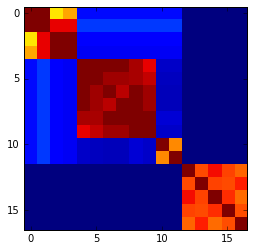

In [5]:
# plot ap names correlation
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(aps_cor, interpolation='nearest')

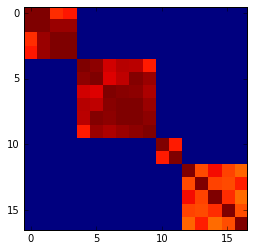

In [6]:
# plot ap macs correlation
plt.imshow(mac_cor, interpolation='nearest')

In [7]:
# Find time limits per POSI id
def posi_time_limits(posi_array):
    # create start and end index time array
    posi_array['ind_begin_time'] = np.zeros((posi_array.shape[0]))
    posi_array['ind_end_time'] = np.zeros((posi_array.shape[0]))
    posi_array['ind_end_time'].iloc[-1] = 99999

    for i in range(1, posi_array.shape[0]):
        cur_split = (float(posi_array['Time'].iloc[i]) + float(posi_array['Time'].iloc[i-1])) / 2
        posi_array['ind_begin_time'].iat[i] = cur_split       
        posi_array['ind_end_time'].iat[i-1] = cur_split       
    return posi_array

track_posi = []
for i in range(len(track_data)):
    track_posi.append([])
    for j in range(len(track_data[i])):
        track_posi[i].append(track_data[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track_data[i][j][0].values == 'POSI'])
        track_posi[i][j] = track_posi[i][j].dropna(axis=1)
        track_posi[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        track_posi[i][j] = posi_time_limits(track_posi[i][j])

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
# Build speed between ground truth points ds / dt
for i in range(len(track_posi)):
    for j in range(len(track_posi[i])):
        track_posi[i][j]['speed_lim'] = np.zeros((track_posi[i][j].shape[0]))
        for k in range(1, track_posi[i][j].shape[0]):
            ds = np.sqrt((float(track_posi[i][j]['Lat'].iloc[k]) - float(track_posi[i][j]['Lat'].iloc[k-1])) ** 2 + 
                         (float(track_posi[i][j]['Lon'].iloc[k]) - float(track_posi[i][j]['Lon'].iloc[k-1])) ** 2)
            dt = float(track_posi[i][j]['Time'].iloc[k]) - float(track_posi[i][j]['Time'].iloc[k-1])
            track_posi[i][j]['speed_lim'].iloc[k] = ds / dt
print(track_posi[0][0].head())    

          Time  index          Lat       Lon  FloorID  BuildingID  \
8512    30.341    1.0  40.31347091  -3.48315      0.0        10.0   
13709   48.878    2.0  40.31332032  -3.48312      0.0        10.0   
22475   80.175    3.0  40.31328135  -3.48342      0.0        10.0   
27694   98.724    4.0  40.31331275  -3.48342      0.0        10.0   
38394  136.709    5.0  40.31333944  -3.48335      0.0        10.0   

       ind_begin_time  ind_end_time  speed_lim  
8512           0.0000       39.6095   0.000000  
13709         39.6095       64.5265   0.000008  
22475         64.5265       89.4495   0.000010  
27694         89.4495      117.7165   0.000002  
38394        117.7165      142.1475   0.000002  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(array([  4.,   7.,  11.,   2.,  33.,  16.,  41.,  32.,  30.,  20.,  16.,
         14.,   7.,   4.,   4.,   4.,   1.,   0.,   4.,   4.]),
 array([  0.00000000e+00,   6.83917899e-07,   1.36783580e-06,
          2.05175370e-06,   2.73567160e-06,   3.41958950e-06,
          4.10350740e-06,   4.78742530e-06,   5.47134320e-06,
          6.15526109e-06,   6.83917899e-06,   7.52309689e-06,
          8.20701479e-06,   8.89093269e-06,   9.57485059e-06,
          1.02587685e-05,   1.09426864e-05,   1.16266043e-05,
          1.23105222e-05,   1.29944401e-05,   1.36783580e-05]),
 <a list of 20 Patch objects>)

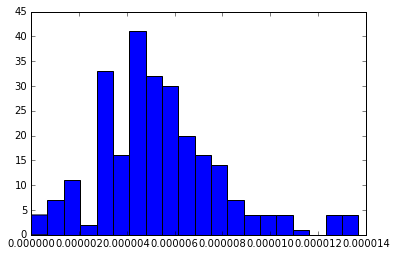

In [9]:
# create a list of all movements in building 10
movements = []
building_index = 0
for i in range(len(track_posi[building_index])):
    movements += list(track_posi[building_index][i]['speed_lim'].values)
plt.hist(movements, bins=20)

In [31]:
# associate signals with POSI ids. Spliting at middle of the time between POSI measurements
for i in range(len(track_data)):
    for j in range(len(track_data[i])):
        print('data: ', i, j)
        track_data[i][j].columns.values[:3] = ['Sensor', 'AppTime', 'SensorTime']
        track_data[i][j]['POSI_index'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_floor'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        track_data[i][j]['POSI_building'] = np.zeros((track_data[i][j].shape[0])) * np.nan
        for k in range(track_posi[i][j].shape[0]):
            ind_begin_time = track_posi[i][j]['ind_begin_time'].iloc[k]
            ind_end_time = track_posi[i][j]['ind_end_time'].iloc[k]
    
            ind = track_posi[i][j]['index'].iloc[k]
            ind_floor = track_posi[i][j]['FloorID'].iloc[k]
            ind_building = track_posi[i][j]['BuildingID'].iloc[k]
            
            index_limits = np.logical_and(track_data[i][j][1].values >= ind_begin_time, 
                                          track_data[i][j][1].values < ind_end_time)
            
            track_data[i][j]['POSI_index'].iloc[index_limits] = ind
            track_data[i][j]['POSI_floor'].iloc[index_limits] = ind_floor
            track_data[i][j]['POSI_building'].iloc[index_limits] = ind_building

print(track_data[0][0].head())

data:  0 0
data:  0 1
data:  0 2
data:  0 3
data:  1 0
data:  1 1
data:  1 2
data:  1 3
data:  1 4
data:  1 5
data:  2 0
data:  2 1
data:  3 0
data:  3 1
data:  3 2
data:  3 3
data:  3 4
  Sensor  AppTime  SensorTime         3          4          5        6  \
0   ACCE    0.094    4292.788  -1.38864    4.62560    8.40844  3.00000   
1   MAGN    0.095    4292.788  -5.64000  -39.72000  -19.56000  3.00000   
2   GYRO    0.097    4292.792  -0.16432   -0.20861   -0.19609  3.00000   
3   AHRS    0.098    4292.792   28.5264     9.6349 -161.85360  0.11909   
4   LIGH    0.098    4292.792   14561.0          3        NaN      NaN   

        7       8    9  10  POSI_index  POSI_floor  POSI_building  
0     NaN     NaN  NaN NaN         1.0         0.0           10.0  
1     NaN     NaN  NaN NaN         1.0         0.0           10.0  
2     NaN     NaN  NaN NaN         1.0         0.0           10.0  
3 -0.2296 -0.9504  3.0 NaN         1.0         0.0           10.0  
4     NaN     NaN  NaN NaN  

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
# Interpolate Lat and Lon of sensors' data
import scipy.interpolate as interpolate
for i in range(len(track_data))[:1]:
    for j in range(len(track_data[i]))[:1]:
        print('data: ', i, j)
        truth_pos_lat = track_posi[i][j]['Lat']
        truth_pos_lon = track_posi[i][j]['Lon']
        truth_pos_time = track_posi[i][j]['Time']
        lin_int = interpolate.interp1d(truth_pos_time.values, truth_pos_lat.values)
        sensor_time = track_data[i][j]['AppTime'].values
        track_data[i][j]['int_Lat'] = lin_int(sensor_time)
        lin_int = interpolate.interp1d(truth_pos_time.values, truth_pos_lon.values)
        sensor_time = track_data[i][j]['AppTime'].values
        track_data[i][j]['int_Lon'] = lin_int(sensor_time)
print(track_data[i][j].head())

data:  0 0


KeyError: 'AppTime'

In [38]:
# create pressure data frames
pres_data = []
for building in track_data:
    pres_data.append([])
    for track in building:
        if track.iloc[track[0].values == 'PRES'].shape[0]:
            pres_data[-1].append(track.iloc[track[0].values == 'PRES'])
            pres_data[-1][-1] = pres_data[-1][-1].dropna(axis=1)
            pres_data[-1][-1] = pres_data[-1][-1].drop(0, axis=1)
            pres_data[-1][-1].columns.values[:4] = ['AppTime', 'SensorTime', 'pres', 'acc']
        else:
            pres_data[-1].append(0)

In [60]:
# filter time series
def holt_filter(sensor_data, time_data, alpha, beta):
    sensor_data = np.array(sensor_data).astype(float)
    time_data = np.array(time_data).astype(float)
    holt_data = np.zeros((sensor_data.shape[0]))
    holt_data[0] = sensor_data[0]
    trend = 0
    for i in range(1, sensor_data.shape[0]):
        dt = time_data[i] - time_data[i-1]
        holt_data[i] = alpha * sensor_data[i] + (1 - alpha) * (holt_data[i-1] + trend * dt)
        trend = beta * (holt_data[i] - holt_data[i-1]) + (1 - beta) * trend
    return holt_data
        

train/UAH/logfile_UAH_R1_S3.txt


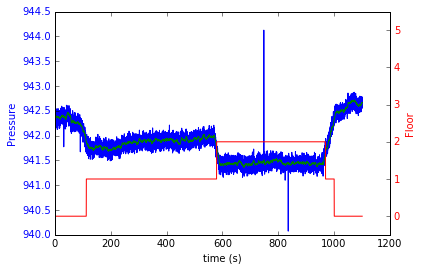

In [79]:
# plot pressure and floor over time
plot_i = 1
plot_j = 0

print(train_files_names[plot_i][plot_j])

holt_seires = holt_filter(pres_data[plot_i][plot_j]['pres'], pres_data[plot_i][plot_j]['SensorTime'], 0.02, 0.02)

fig, ax1 = plt.subplots()
ax1.plot(pres_data[plot_i][plot_j]['AppTime'], pres_data[plot_i][plot_j]['pres'], 'b', 
         pres_data[plot_i][plot_j]['AppTime'], holt_seires, 'g')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Pressure', color='b')
# ax1.set_ylim([997,1002])
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
ax2.plot(pres_data[plot_i][plot_j]['AppTime'], pres_data[plot_i][plot_j]['POSI_floor'], 'r')
ax2.set_ylabel('Floor', color='r')
ax2.set_ylim([-0.5,5.5])
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [12]:
# create wifi data frames
wifi_data = []
for building in track_data:
    wifi_data.append([])
    for track in building:
        wifi_data[-1].append(track[[1, 4, 5, 'POSI_index','POSI_floor', 'POSI_building', 'POSI_lat',  
                                    'POSI_lon']].iloc[track[0].values == 'WIFI'])
        wifi_data[-1][-1].columns.values[:3] = ['AppTime', 'MAC', 'rssi']
print(wifi_data[0][0].head())

     AppTime                MAC  rssi  POSI_index  POSI_floor  POSI_building  \
637    2.293  00:0b:86:27:36:c2 -82.0         1.0         0.0           10.0   
638    2.293  00:0b:86:27:32:e0 -66.0         1.0         0.0           10.0   
639    2.293  00:0b:86:27:32:e2 -66.0         1.0         0.0           10.0   
640    2.293  00:0b:86:27:32:e1 -68.0         1.0         0.0           10.0   
641    2.293  00:0b:86:27:36:c0 -82.0         1.0         0.0           10.0   

        POSI_lat  POSI_lon  
637  40.31347091  -3.48315  
638  40.31347091  -3.48315  
639  40.31347091  -3.48315  
640  40.31347091  -3.48315  
641  40.31347091  -3.48315  


In [13]:
# create list of mac addresses for each building
building_macs = []
for i in range(len(wifi_data)):
    building_macs.append([])
    for j in range(len(wifi_data[i])):
        track_mac_array = wifi_data[i][j]['MAC'].values
        for mac_add in track_mac_array:
            if not mac_add in building_macs[i]:
                building_macs[i].append(mac_add)
    print(i, len(building_macs[i]))

# create list of mac addresses for each building for each floor
# building_macs = []
# for i in range(len(wifi_data)):
#     building_macs.append([])
#     for j in range(len(wifi_data[i])):
#         track_mac_array = wifi_data[i][j]['MAC'].values
#         for mac_add in track_mac_array:
#             if not mac_add in building_macs[i]:
#                 building_macs[i].append(mac_add)
#     print(i, len(building_macs[i]))

0 51
1 353
2 158
3 180


In [14]:
# make WiFi data into dummy variable
wifi_dummy_data = []
for i in range(len(wifi_data)):
    wifi_dummy_data.append([])
    for j in range(len(wifi_data[i])):
        wifi_samples_cur = np.unique(wifi_data[i][j]['AppTime'].values)
        wifi_dummy_cur = np.ones((wifi_samples_cur.shape[0], len(building_macs[i]))) * -200
        wifi_dummy_cur = pd.DataFrame(wifi_dummy_cur, columns=building_macs[i], index=wifi_samples_cur)
        print(i, j, wifi_samples_cur.shape[0])
        for k, sample_time in enumerate(wifi_samples_cur):
            wifi_cur = wifi_data[i][j].iloc[wifi_data[i][j]['AppTime'].values == sample_time]
            for l in range(wifi_cur.shape[0]):
                wifi_dummy_cur[wifi_cur['MAC'].iat[l]].iat[k] = wifi_cur['rssi'].iat[l]
        wifi_dummy_data[i].append(wifi_dummy_cur)
print(wifi_dummy_data[0][0].head())

0 0 232
0 1 210
0 2 222
0 3 221
1 0 150
1 1 276
1 2 188
1 3 297
1 4 73
1 5 127
2 0 274
2 1 138
3 0 131
3 1 98
3 2 114
3 3 92
3 4 128
        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
2.293               -82.0              -66.0              -66.0   
8.276               -84.0              -69.0              -69.0   
14.269              -85.0              -65.0              -68.0   
18.284              -83.0              -65.0              -66.0   
24.253              -81.0              -65.0              -65.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
2.293               -68.0              -82.0              -82.0   
8.276               -69.0              -84.0              -87.0   
14.269              -68.0              -85.0              -86.0   
18.284              -64.0              -82.0              -82.0   
24.253              -65.0              -82.0              -80.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:

In [16]:
# Normalize wifi and cut noise
noise_level = -50
for i in range(len(wifi_dummy_data)):
    for j in range(len(wifi_dummy_data[i])):
        max_per_line = np.amax(wifi_dummy_data[i][j].values, axis=1)
        wifi_dummy_data[i][j].iloc[:, :] = wifi_dummy_data[i][j].values - max_per_line.reshape((max_per_line.shape[0], 1))
        noise_not = (wifi_dummy_data[i][j].values >= noise_level) * 1
        wifi_dummy_data[i][j].iloc[:, :] = noise_not * wifi_dummy_data[i][j].values + (1- noise_not) * noise_level

# random macs
# x2-xx-xx-xx-xx-xx
# x6-xx-xx-xx-xx-xx
# xA-xx-xx-xx-xx-xx
# xE-xx-xx-xx-xx-xx
# print(building_macs[3])

[[-16.   0.   0. ..., -50. -50. -50.]
 [-15.   0.   0. ..., -50. -50. -50.]
 [-20.   0.  -3. ..., -50. -50. -50.]
 ..., 
 [ -9.   0.  -5. ..., -50. -50. -50.]
 [-12.  -1.   0. ..., -50. -50. -50.]
 [-14.  -1.   0. ..., -50. -50. -50.]]
0.0


In [ ]:
# Check GPS data accuracy